<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2006%EC%9D%BC/11%EC%9B%94_6%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가별 음주 데이터 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drink = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/drinks.csv')
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
# 맥주 & 와인 소비량의 상관관계 분석
data = drink[['beer_servings','wine_servings']].corr(method='pearson')
# corr_d = data.corr()

# sns.heatmap(corr_d,annot=True)
data

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [ ]:
# 여러 피쳐들 간의 상관관계
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drink[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


<Axes: >

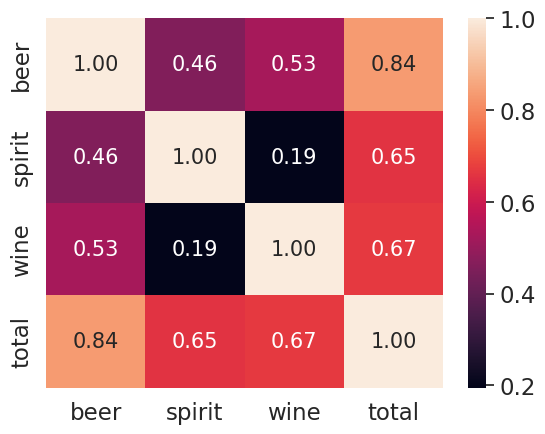

In [ ]:
# 위 결과 시각화 하기
cols_view = ['beer','spirit','wine','total']
sns.set(font_scale=1.5)
sns.heatmap(
    corr.values,
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size':15},  # 표시되는 숫자의 크기 지정
    yticklabels=cols_view,
    xticklabels=cols_view)

In [ ]:
# 대륙에 대한 정보 없는 국가들 OT로 표기
drink['continent'].isnull().sum()
drink['continent'].fillna('OT',inplace=True)
drink['continent'].isnull().sum()

0

<Axes: ylabel='continent'>

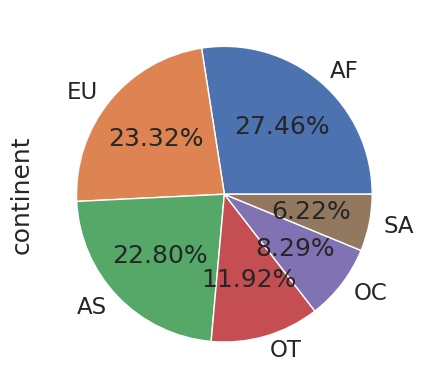

In [ ]:
# 대륙 분포 파이 차트로 시각화
explode = (0, 0, 0, 0.5, 0, 0)
drink['continent'].value_counts().plot.pie(autopct='%.2f%%')


In [ ]:
# 대륙별 spirit_servings 평균, 최대, 최소, 합계 계산
drink.groupby('continent').spirit_servings.agg(['mean','max','min','sum'])

,mean,max,min,sum
continent,,,,
AF,16.339623,152,0,866
AS,60.840909,326,0,2677
EU,132.555556,373,0,5965
OC,58.437500,254,0,935
OT,165.739130,438,68,3812
SA,114.750000,302,25,1377


In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.

# 전체 평균
total_mean = drink['total_litres_of_pure_alcohol'].mean()
total_mean

# 대륙별 평균
cont_mean = drink.groupby('continent').total_litres_of_pure_alcohol.mean()
cont_mean

# 결과
result = cont_mean[cont_mean>=total_mean]
result

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer = drink.groupby('continent').beer_servings.mean().idxmax()
beer

'EU'

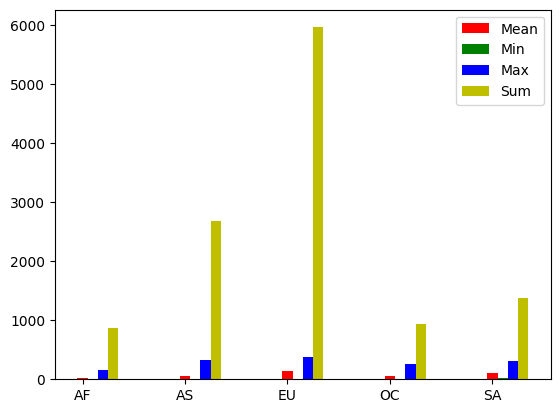

In [6]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.(막대그래프)
result = drink.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')

rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')

rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

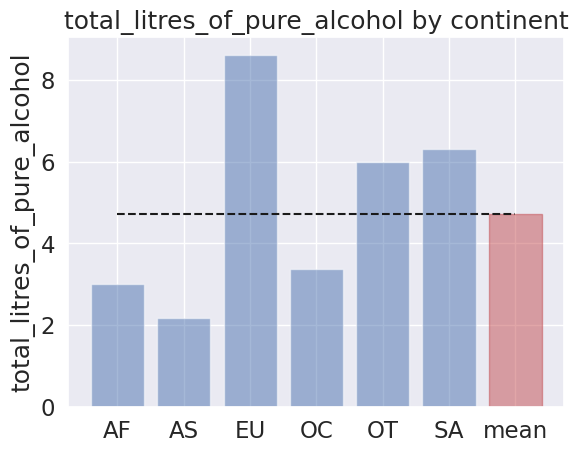

In [ ]:
# 대륙별 total_litres_of_pure_alcohol 막대그래프 시각화

continents = cont_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = cont_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[-1].set_color('r')

plt.plot([0.,6], [total_mean, total_mean], 'k--')  #  x-축 범위 [0, 6]에 대해 y-축 값 'total_mean'으로 수평 점선을 그립니다
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by continent')
plt.show()

# 판다스 정리 문제

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/netflix.csv', parse_dates=['date_added'])
data.head()

,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie


In [ ]:
# 1. 제목이 'Limitless' 인 모든 컨텐츠를 찾아보세요.
data[data.title=='Limitless']

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


In [ ]:
# 2. 'Robert Rodriguez' 감독이 제작하고 유형이 'Movie'인 모든 컨텐츠를 찾아보세요.
data[(data.director=='Robert Rodriguez') & (data.type=='Movie')]

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


In [ ]:
# 3. 등록된 날짜가 '2019-07-31'이거나 감독이 'Robert Altman'인 모든 컨텐츠를 찾아보세요.
data[(data.director=='Robert Altman') | (data.date_added=='2019-07-31')]

,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


In [ ]:
# 4. 감독이 'Orson Welles', 'Aditya Kripalani' 또는 'Sam Raimi' 인 모든 컨텐츠를 찾아보세요.
data[(data.director=='Orson Welles') | (data.director=='Aditya Kripalani') | (data.director=='Sam Raimi') ]

,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,2018-08-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,2019-06-25,Movie


In [ ]:
# 5.  2019년 5월 1일과 2019년 6월 1일 사이에 등록된 모든 컨텐츠를 찾아보세요.
con = data['date_added'].between('2019-05-01','2019-06-01')
data[con].head()

,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie


In [ ]:
# 6. director 열에서 NaN값이 있는 모든 행을 삭제해보세요.
data.dropna(subset='director').head()

,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie


In [ ]:
# 7. 넷플릭스가 컨텐츠를 단 하나만 등록한 날짜를 식별하세요.
data.drop_duplicates(subset='date_added',keep=False)

,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
70,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,2014-02-16,Movie
...,...,...,...,...
5748,Menorca,John Barnard,2017-08-27,Movie
5749,Green Room,Jeremy Saulnier,2018-11-12,Movie
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie


# 오후 진도

In [ ]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drink.loc[drink['continent']=='AF']
europe = drink.loc[drink['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'], equal_var=False)

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f'%tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


In [ ]:
drink['total_servings'] = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']

# 술 소비량 대비 알콜 비율 피쳐 생산
drink['alcohol_rate'] = drink['total_litres_of_pure_alcohol'] / drink['total_servings']
drink['alcohol_rate'] = drink['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = drink[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by='alcohol_rate', ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


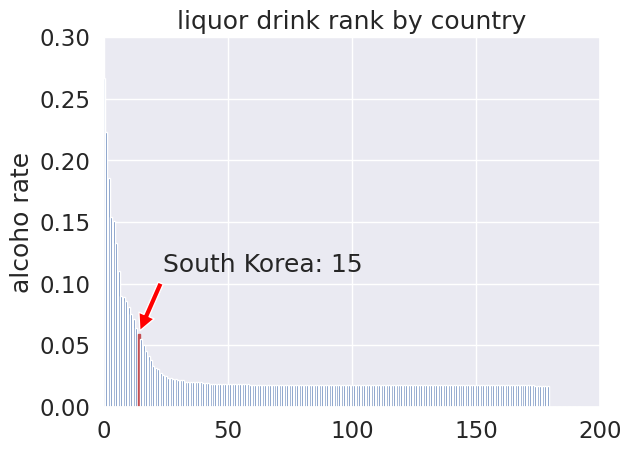

In [ ]:
# 한국의 술 소비량 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcoho rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] =='South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea: ' + str(korea_rank + 1),
             xy=(korea_rank, korea_alc_rate),
             xytext=(korea_rank+10, korea_alc_rate+0.05),
             arrowprops=dict(facecolor='red',shrink=0.05))
plt.show()